In [ ]:
import pandas as pd
from ultralytics import YOLO
import os
from evaluations.utils.plot import plot_precision_recall_curve

HOME = os.getcwd()

DATASET_DIRECTORY = f"{HOME}/datasets/data.yaml"


In [ ]:
model = YOLO(f"{HOME}/weights/epoch100.pt")

metrics = model.val(
    data=DATASET_DIRECTORY,
    save_json=True,
    split="test",
    name="epoch_100"
)

iou_score = metrics
p = metrics.seg.p
r = metrics.seg.r

# Create a DataFrame with metrics
df = pd.DataFrame(
    columns=["Precision", "Recall", "AP 50", "AP 75", "AP 50:95"],
    data=[[p[0], r[0], metrics.seg.map50, metrics.seg.map75, metrics.seg.map]],
)

df

Ultralytics 8.3.73 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv9c-seg summary (fused): 411 layers, 27,625,299 parameters, 0 gradients, 157.6 GFLOPs


val: Scanning /app/datasets/test/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100% 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:46<00:00, 23.43s/it]


                   all         29        139      0.957      0.971       0.99      0.865       0.95      0.964       0.98      0.843
Speed: 9.7ms preprocess, 1488.0ms inference, 0.0ms loss, 9.6ms postprocess per image
Saving /ultralytics/runs/segment/epoch_100/predictions.json...
Results saved to /ultralytics/runs/segment/epoch_100


,Precision,Recall,AP 50,AP 75,AP 50:95
0,0.95034,0.963723,0.980342,0.956078,0.842756


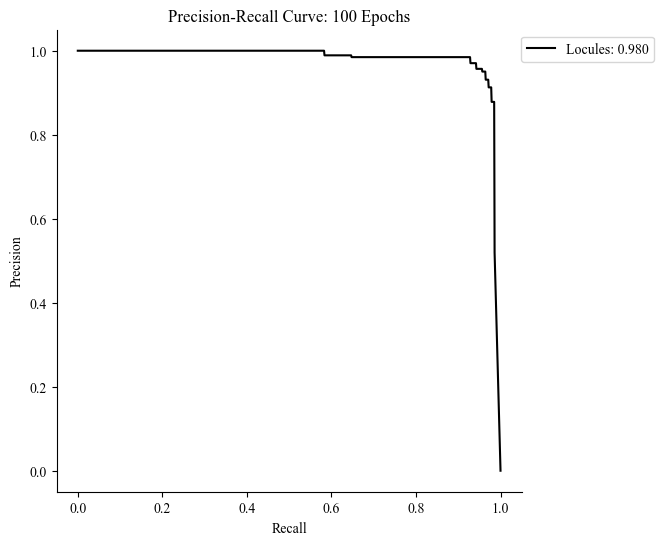

In [ ]:
%matplotlib inline
plot_precision_recall_curve(metrics, "100 Epochs")